In [1]:
import numpy as np
import matplotlib.pyplot as plt

### taks
first create an function *sq_and_add* which takes 3 inputs: $z$, $c$ and $n$
the function should calculate a new value **z_new** based on the formular

$ z_{new} = z^2 + c $

z_new is then passt into the function as the new z value,
the function should to this n times and then return the final z_new
(recursive function)

In [2]:
def sq_and_add(value,added,n):
    if n<=0:
        return value
    z_new = value**2+ added
    return sq_and_add(z_new,added,n-1)

### taks
not create an equidistend vector **X** using numpy with 1000 values in the range [-4,2]
and a vector $y=sq\_and\_add(0,x,100)$
and plot the x,y pair

C:\Users\be34gof\AppData\Local\Temp/ipykernel_1176/2110114896.py:4: RuntimeWarning: overflow encountered in square
  z_new = value**2+ added


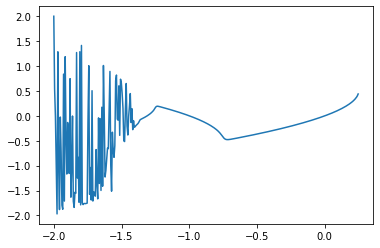

In [3]:
x=np.linspace(-4,2,1000)
y=sq_and_add(0,x,100)
plt.plot(x,y)
plt.show()
plt.close()

note how the x range i the plot ranges only from -2 to just above 0 (and also there is some sort of warning).
a look at y:

In [4]:
y

array([        inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,      

reveales that many values are *inf*, which is the numpy value for values that are to large to be represented as a float by your computer

In [5]:
#random info, the biggest value is:
np.finfo(float).max

1.7976931348623157e+308

### taks
create a mask (and array with identical shhape but with boolean values) of y which selects only values not infinite

and print all corresponding minimum and maximum x values

In [6]:
y_mask=y<np.inf
x_masked = x[y_mask]
x_masked.min(),x_masked.max()

(-2.0, 0.2462462462462458)

### taks
now write a function *sq_and_add_and_count* which does the same as before exept it takes an additional parameter **threshold** and a **counter**,
and the function does not return the final x value, but counts how long the absolute value of **x** takes to become larger than **threshold** and stores this value in counter.
Absolute x is necessary since negative infinity is also possible and is not equal to infinity but should fullfill the condition.

(tip: increase the counter each recursive call)

In [7]:
#original function
def sq_and_add(value,added,n,threshold,counter):
    if n<=0:
        return value
    z_new = value**2+ added
    return sq_and_add(z_new,added,n-1,threshold,counter)

#v1
def sq_and_add_and_count(value,added,n,threshold,counter):
    if n<=0:
        return counter # returns the counter in the end
    z_new = value**2 + added
    # note the abs(olute) 
    counter[abs(z_new)<threshold]+=1 #all positions in the counter where z_new is smaller than the threshold increases by 1
    return sq_and_add_and_count(z_new,added,n-1,threshold,counter) #note the function call update

### taks
plot the output of the function in the same way as before

C:\Users\be34gof\AppData\Local\Temp/ipykernel_1176/625736792.py:12: RuntimeWarning: overflow encountered in square
  z_new = value**2 + added


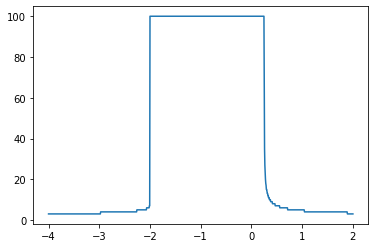

In [8]:
counter=np.zeros_like(x)
y=sq_and_add_and_count(0,x,100,1000,counter)
plt.plot(x,counter) #not since the counter gets updated in place whe dont need and return variable but can use the counter as it is
plt.show()
plt.close()

### getting towards the end
numpy can also work with complex numbers in the for $x=a+ib$ (with $i=\sqrt(-1)$), but python uses $j$ instead of $i$ for the imaginary part (adopted from electical engineering, I guess)

In [9]:
(2+3j)+10 # works 

(12+3j)

now crate an compelx with real values ranging from -2 to 1, with 300 steps  and imaginary part ranges from -1 to 1 with 200 steps.
Tip:
Create an 300x200 array *c* filled with zeros (np.zeros)
iterate over the first dimension and set the seconds one (c[i,:]=...)

then plot the absolute value  with matplotlib.imshow (plots 3d-data, where the color corresponds to the value). You have to plot the absolute value since matplotlib cannot plot complex numbers.

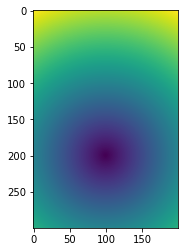

In [27]:
c=np.zeros((300,200),dtype=complex) # the shape has to be an list or an tuple
x=np.linspace(-2,1,300) # our x values (real part)
y=np.linspace(-1,1,200)*1j # our y values (imaginary part)
for r,xi in enumerate(x): # iterate over al x values and keep track of the current index
    c[r,:] = xi+y #set the index of the first dimension to the real x value (constant for this index) +  all imaginary values
plt.imshow(abs(c))
plt.show()
plt.close()

with oput going into detail, this can also be done be done via

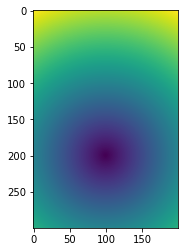

In [26]:
x=np.linspace(-2,1,300)
y=np.linspace(-1,1,200)
c = x[:,None] + 1j*y[None,:]
plt.imshow(abs(c))
plt.show()
plt.close()

note that imshow plots our x_axis vertically, so we shoudl rotate the image. this can be done via Transforming the array:

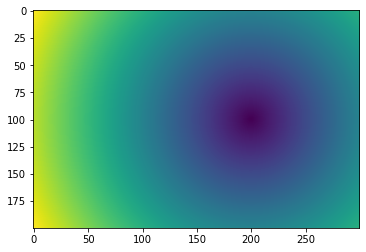

In [28]:
plt.imshow(abs(c).T)

anf (almost) finally throw the complex array c into the *sq_and_add_and_count* function:

C:\Users\be34gof\AppData\Local\Temp/ipykernel_1176/2533099995.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  counter=np.zeros_like(c).astype(int)
C:\Users\be34gof\AppData\Local\Temp/ipykernel_1176/625736792.py:12: RuntimeWarning: overflow encountered in square
  z_new = value**2 + added
C:\Users\be34gof\AppData\Local\Temp/ipykernel_1176/625736792.py:12: RuntimeWarning: invalid value encountered in square
  z_new = value**2 + added
C:\Users\be34gof\AppData\Local\Temp/ipykernel_1176/625736792.py:14: RuntimeWarning: overflow encountered in absolute
  counter[abs(z_new)<threshold]+=1 #all positions in the counter where z_new is smaller than the threshold increases by 1


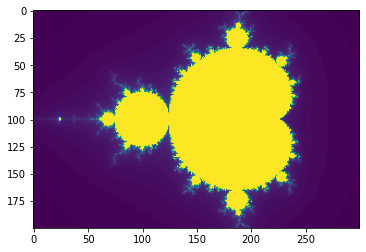

In [29]:
counter=np.zeros_like(c).astype(int)
sq_and_add_and_count(0,c,100,1000,counter)
counter
plt.imshow(counter.T)
plt.show()
plt.close()

congratus you just plottet the mandelbrot set

## truly bonus
we can also create an zoom in animation for this we need the package imageio which can be installed via:

In [32]:
#install a small tool go generate 
!pip install imageio

if you want you can try to tweak numbers and see whats happening (http://www.cuug.ab.ca/dewara/mandelbrot/Mandelbrowser.html)

1.5, 1.5526315789473684, 1.6052631578947367, 1.6578947368421053, 1.7105263157894737, 1.763157894736842, 1.8157894736842106, 1.868421052631579, 1.9210526315789473, 1.9736842105263157, 2.026315789473684, 2.0789473684210527, 2.1315789473684212, 2.1842105263157894, 2.236842105263158, 2.2894736842105265, 2.3421052631578947, 2.394736842105263, 2.4473684210526314, 2.5, 2.552631578947368, 2.6052631578947367, 2.6578947368421053, 2.7105263157894735, 2.763157894736842, 2.8157894736842106, 2.8684210526315788, 2.9210526315789473, 2.973684210526316, 3.026315789473684, 3.0789473684210527, 3.1315789473684212, 3.1842105263157894, 3.2368421052631575, 3.289473684210526, 3.3421052631578947, 3.394736842105263, 3.4473684210526314, 3.5, 3.552631578947368, 3.6052631578947367, 3.6578947368421053, 3.7105263157894735, 3.763157894736842, 3.8157894736842106, 3.8684210526315788, 3.9210526315789473, 3.9736842105263155, 4.026315789473684, 4.078947368421053, 4.131578947368421, 4.184210526315789, 4.2368421052631575, 4.

C:\Users\be34gof\AppData\Local\Temp/ipykernel_1176/3726595943.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  counter=np.zeros_like(c).astype(int)


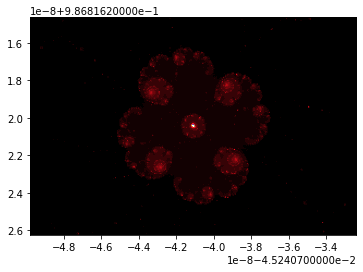

10.289473684210526, 

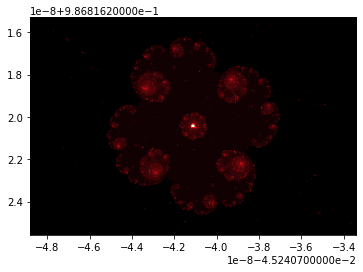

10.342105263157894, 

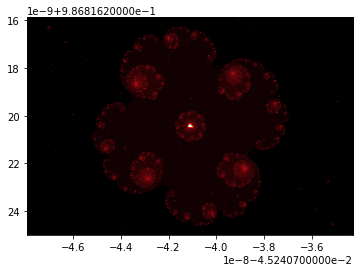

10.394736842105262, 

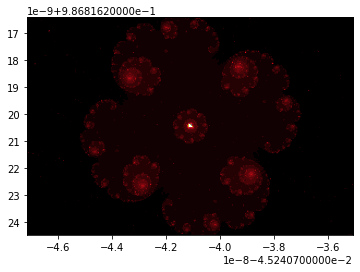

10.447368421052632, 

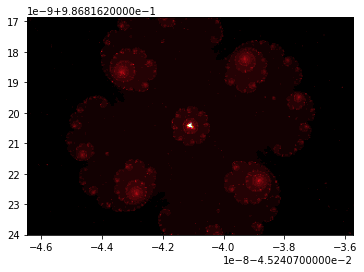

10.5, 

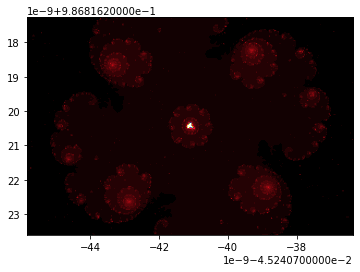

10.552631578947368, 

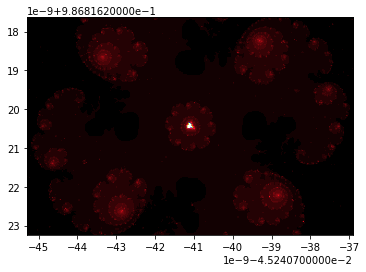

10.605263157894736, 

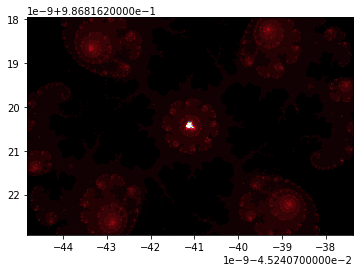

10.657894736842104, 

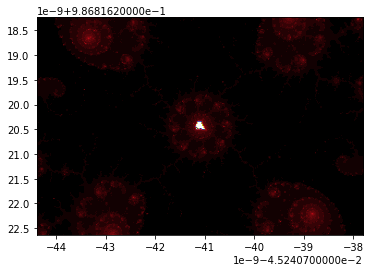

10.710526315789473, 

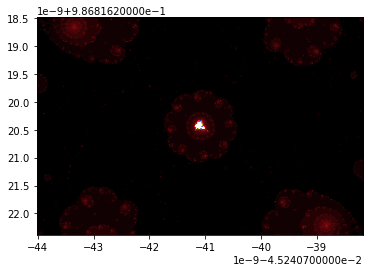

10.763157894736842, 

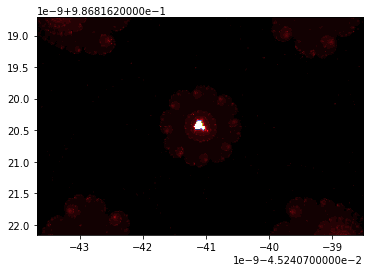

10.81578947368421, 

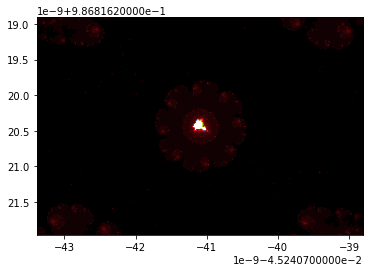

10.868421052631579, 

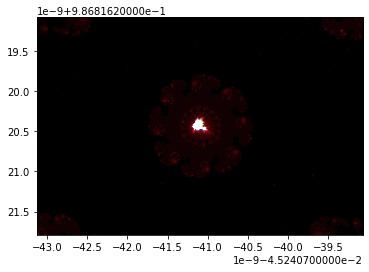

10.921052631578947, 

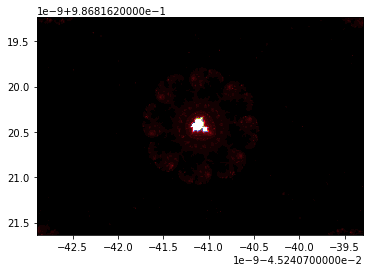

10.973684210526315, 

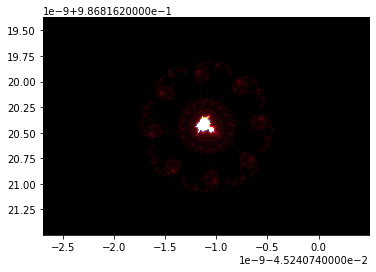

11.026315789473683, 

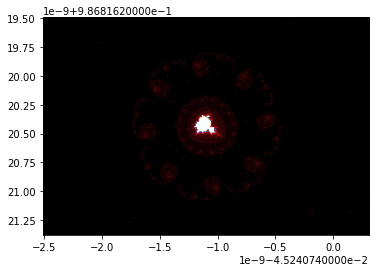

11.078947368421051, 

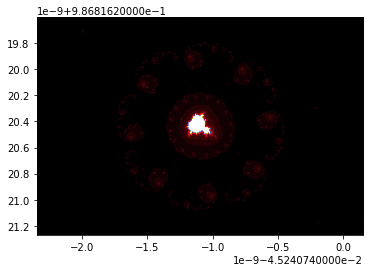

11.131578947368421, 

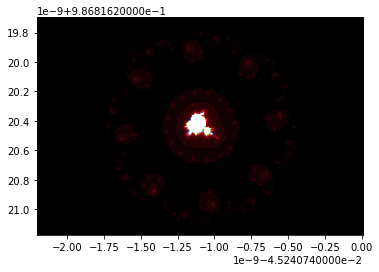

11.18421052631579, 

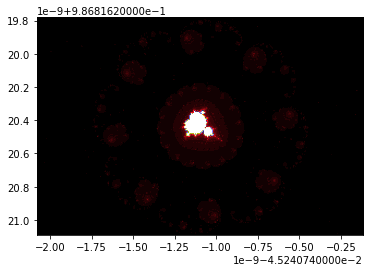

11.236842105263158, 

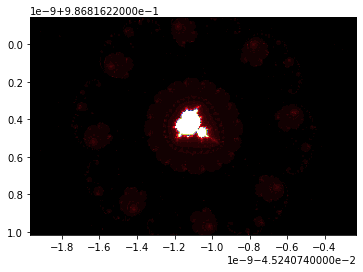

11.289473684210526, 

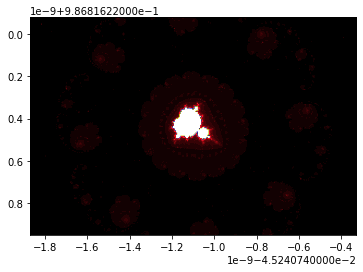

11.342105263157894, 

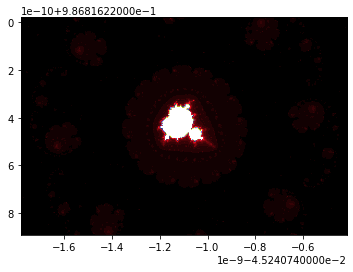

11.394736842105262, 

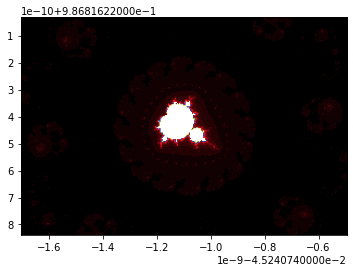

11.447368421052632, 

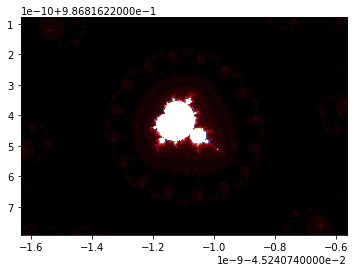

11.5, 

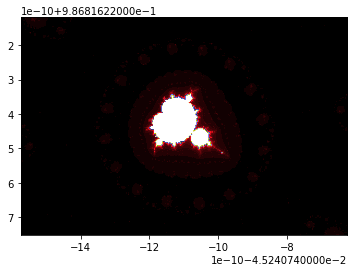

In [33]:
t=[-0.0452407411,0.9868162204352258] # the cooridnates the image should zoom towarsds
center_x = 0 # the starting center x of the iamge
center_y = 0  # the starting center y of the iamge
x_pixel = 150*2 # numer  of pixel, higher looks better but talkes longer
y_pixel = 100*2 # numer  of pixel, higher looks better but talkes longer

import imageio,os # import of the new packaage
os.makedirs("temp",exist_ok=True) # create new folder (if it does not exists)


# this non recursive function is necessary since for high zoom factors we would need a high recursion (more than 1500 times the function calls itself, which is not very efficient and runs into problems)
# but basicly it does the same in an for loop
# the masking is to prevent doing the math fpr pixels which are already over the threshold
def sq_and_add_and_count_non_recursive(value,added,n,threshold,counter):
    mask=np.ones_like(added).astype(bool)
    value=np.ones_like(added)*value
    thsq=threshold**2
    for i in range(n):
        mask[mask] = value[mask].real**2 + value[mask].imag**2<thsq
        value[mask] = value[mask]**2 + added[mask]   
        counter[mask]+=1
        

        
images=[] # 
for i in np.linspace(1.5,11.5,191): # linear increaseing of the zoom factor
    print(i,end = ", ") # printing the current frame
    res=10**(-i) # the resolution corresponds to the zoom factor  and is exponential
    max_recurisve = max(100,int(1/(res**0.4))) # maximum recoursive calls, for higher resolutions (smaller res values) this needs to be bigger, I choose this one via trial and error

    fn=os.path.join("temp",f"{i}.png") # the filename of the image
    if not os.path.exists(fn): # only creates the image if it does not exists
        # the maximum values based obn the center and on the resolution
        xmin = center_x-x_pixel*res/2 
        xmax = center_x+x_pixel*res/2
        ymin = center_y-y_pixel*res/2
        ymax = center_y+y_pixel*res/2
        
        #creates the new complex array
        x=np.linspace(xmin,xmax,x_pixel)
        y=np.linspace(ymin,ymax,y_pixel)
        c = x[:,None] + 1j*y[None,:]
        counter=np.zeros_like(c).astype(int)
        
        #and does the iteration
        sq_and_add_and_count_non_recursive(0,c,max_recurisve,1000,counter)
        
       
        plt.imshow(counter.T,cmap="gist_stern",extent=[xmin,xmax,ymax,ymin])  # creates the plot
        plt.savefig(fn) # save the iamge
        plt.show()  #shows the image
        plt.close()  #clsoers the image for the next iteration
        
    # add the image to the image list
    images.append(imageio.imread(fn))
    
    # updates the center by shifting it to the middel between the center and the target
    center_x =center_x - (center_x-t[0])/2
    center_y = center_y-(center_y-t[1])/2
    
#create gif from the image lsit
imageio.mimsave('temp/movie.gif', images)

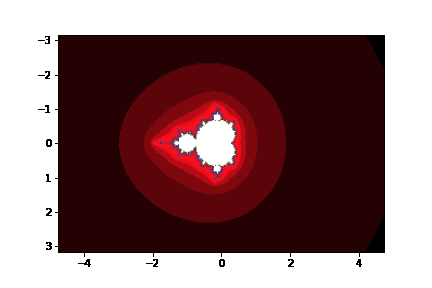

In [34]:
#displaying the gif
from IPython.core.display import Image
Image("temp/movie.gif")